C:\Users\ASUS\AppData\Local\Temp\ipykernel_11524\306531315.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, linestyle='dashed', color=colors[i])


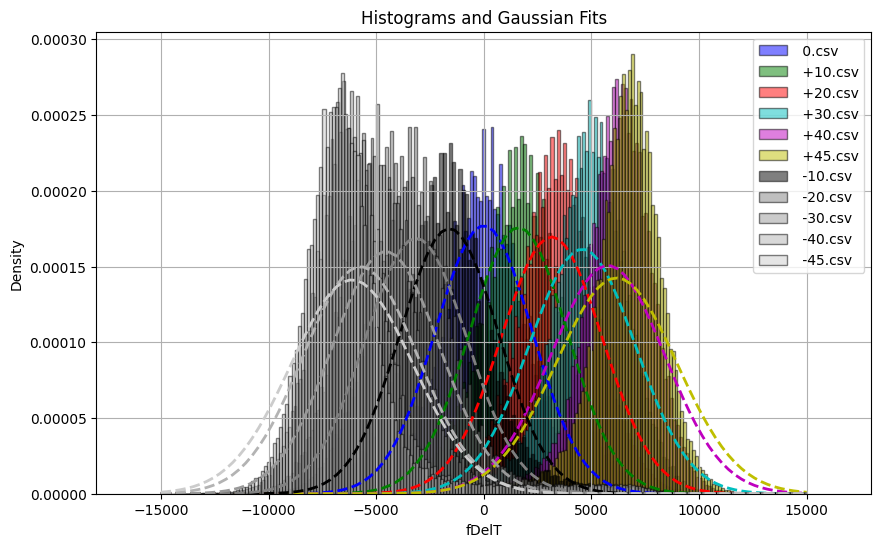

0.csv
Average fDelT: -1.5077585681901263e-07
Mode fDelT: -54.23978978486996
Standard Deviation fDelT: 2253.972654942119
----------------------------------------
+10.csv
Average fDelT: 1611.960213464784
Mode fDelT: 1445.76021021513
Standard Deviation fDelT: 2269.6561744862283
----------------------------------------
+20.csv
Average fDelT: 3151.810030323891
Mode fDelT: 3445.7602102151304
Standard Deviation fDelT: 2352.603105780497
----------------------------------------
+30.csv
Average fDelT: 4572.589687061109
Mode fDelT: 4945.76021021513
Standard Deviation fDelT: 2471.282790097619
----------------------------------------
+40.csv
Average fDelT: 5763.44773383509
Mode fDelT: 6742.76021021513
Standard Deviation fDelT: 2647.828776032433
----------------------------------------
+45.csv
Average fDelT: 6165.932848373957
Mode fDelT: 6742.76021021513
Standard Deviation fDelT: 2800.3522682676316
----------------------------------------
-10.csv
Average fDelT: -1600.4022235236632
Mode fDelT: -1554.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# List of specific CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv', 'Data_+45.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv', 'Data_-45.csv'
]

# Function to extract infix from file name
def get_infix(file):
    return file.split('_')[1]

# Function to calculate statistics and return data for a single file
def analyze_file(file):
    data = pd.read_csv(file)
    
    average_fDelT = data['corrected'].mean()
    mode_fDelT = data['corrected'].mode()[0] if not data['corrected'].mode().empty else None
    std_dev_fDelT = data['corrected'].std()
    
    return data['corrected'], average_fDelT, mode_fDelT, std_dev_fDelT

# Create a list to store data for each file
file_data = []

# Analyze each file and store the data
for file in csv_files:
    file_data.append(analyze_file(file))

# Create a figure for the combined plot
plt.figure(figsize=(10, 6))

# Set the x-axis range from -18000 to +18000
plt.xlim(-18000, 18000)

# Plot histograms and Gaussian curves for each file with different colors and labels
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '0.5', '0.6', '0.7', '0.8']
for i, (fDelT_data, average_fDelT, _, std_dev_fDelT) in enumerate(file_data):
    infix = get_infix(csv_files[i])
    # Plot the histogram
    plt.hist(fDelT_data, bins=200, density=True, edgecolor='black', alpha=0.5, label=f' {infix}', color=colors[i])
    
    # Plot the Gaussian curve
    x = np.linspace(-15000, 15000, 100)
    p = norm.pdf(x, average_fDelT, std_dev_fDelT)
    plt.plot(x, p, 'k', linewidth=2, linestyle='dashed', color=colors[i])

plt.title('Histograms and Gaussian Fits')
plt.xlabel('fDelT')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

# Print statistics for each file
for i, (_, average_fDelT, mode_fDelT, std_dev_fDelT) in enumerate(file_data):
    infix = get_infix(csv_files[i])
    print(f'{infix}')
    print(f'Average fDelT: {average_fDelT}')
    print(f'Mode fDelT: {mode_fDelT}')
    print(f'Standard Deviation fDelT: {std_dev_fDelT}')
    print('-' * 40)
